In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import warnings

In [38]:
df=pd.read_csv("data/stud.csv")

In [39]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [40]:
x=df.drop(columns=["math_score"],axis=1)

In [41]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [42]:
y=df["math_score"]

In [43]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [44]:
num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transfomrmer=StandardScaler()
oh_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transfomrmer,num_features),
    ]
)

In [45]:
x=preprocessor.fit_transform(x)

In [46]:
x.shape

(1000, 19)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

In [48]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_sqaure=r2_score(true,predicted)
    return mae,rmse,r2_sqaure

In [49]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "k-Neighbors Regression":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regression":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "catboosting Regression":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
        
}
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print("Model performance for Traning set")
    print("_Root Mean Squared Error:{:.4f}".format(model_train_rmse))
    print("_Mean Absolute Error:{:.4f}".format(model_train_mae))
    print("_R2 Score:{:.4f}".format(model_train_r2))
    print("--------------------------")
    print("Model performance for test set")
    print("Model performance for Test set")
    print("_Root Mean Squared Error:{:.4f}".format(model_test_rmse))
    print("_Mean Absolute Error:{:.4f}".format(model_test_mae))
    print("_R2 Score:{:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    print('='*35)
    print('\n')
          

Linear Regression
Model performance for Traning set
_Root Mean Squared Error:5.3276
_Mean Absolute Error:4.2691
_R2 Score:0.8741
--------------------------
Model performance for test set
Model performance for Test set
_Root Mean Squared Error:5.4185
_Mean Absolute Error:4.2234
_R2 Score:0.8793


Lasso
Model performance for Traning set
_Root Mean Squared Error:6.5938
_Mean Absolute Error:5.2063
_R2 Score:0.8071
--------------------------
Model performance for test set
Model performance for Test set
_Root Mean Squared Error:6.5197
_Mean Absolute Error:5.1579
_R2 Score:0.8253


Ridge
Model performance for Traning set
_Root Mean Squared Error:5.3233
_Mean Absolute Error:4.2650
_R2 Score:0.8743
--------------------------
Model performance for test set
Model performance for Test set
_Root Mean Squared Error:5.3904
_Mean Absolute Error:4.2111
_R2 Score:0.8806


k-Neighbors Regression
Model performance for Traning set
_Root Mean Squared Error:5.7091
_Mean Absolute Error:4.5175
_R2 Score:0.8554

In [50]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=["R2_Score"],ascending=False)
 

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879345
5,Random Forest Regression,0.853904
7,catboosting Regression,0.851632
8,AdaBoost Regressor,0.851448
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,k-Neighbors Regression,0.783497
4,Decision Tree,0.742848


In [51]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)


Accuracy of the model is 87.93


Text(0, 0.5, 'Predicted')

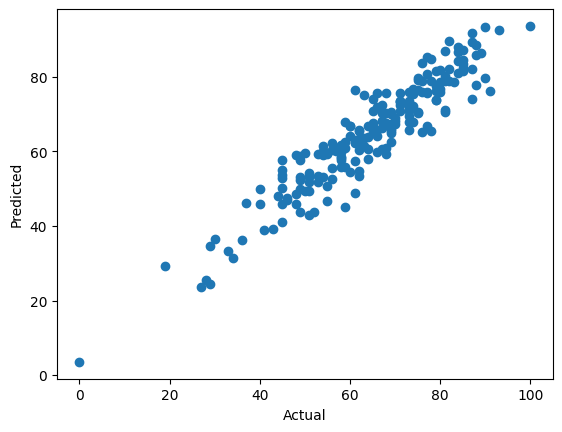

In [52]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color="red")

<Axes: xlabel='math_score'>

In [ ]:
pred_df=pd.DataFrame({'Actual value':y_test,'predicted value':y_pred,'difference':y_test-y_pred})
pred_df

,Actual value,predicted value,difference
521,91,76.18750,14.81250
737,53,59.21875,-6.21875
740,80,76.81250,3.18750
660,74,76.81250,-2.81250
411,84,87.96875,-3.96875
...,...,...,...
408,52,43.78125,8.21875
332,62,62.40625,-0.40625
208,74,67.81250,6.18750
613,65,66.84375,-1.84375
